In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the dataset
data=pd.read_csv("C:/Users/Dell/Downloads/BIKE DETAILS.csv")
data

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [3]:
# Display the first few rows
print(data.head())

                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN  


In [4]:
# Check data structure
print(data.info())

# View basic statistics
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB
None
       selling_price         year      km_driven  ex_showroom_price
count    1061.000000  1061.000000    1061.000000       6.260000e+02
mean    59638.151744  2013.867107   34359.833176       8.795871e+04
std     56304.291973     4.301191   51623.152702       7.749659e+04
min      5000.000000  1988.000000     350.000000       3.049000e+04
25%     28000.000000  2011.000000   13500.000000      

In [5]:
#check for the duplicated values
print(data.duplicated().sum())

6


In [6]:
#Remove duplicate rows to ensure data integrity
#Drop Duplicates
data=data.drop_duplicates()


In [7]:
# Verify data types after conversion
print(data.dtypes)

name                  object
selling_price          int64
year                   int64
seller_type           object
owner                 object
km_driven              int64
ex_showroom_price    float64
dtype: object


In [8]:
# Example: Handle outliers in 'price' column
if 'selling_price' in data.columns:
    Q1 = data['selling_price'].quantile(0.25)  # First quartile
    Q3 = data['selling_price'].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1                      # Interquartile range

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out rows with outliers
    data = data[(data['selling_price'] >= lower_bound) & (data['selling_price'] <= upper_bound)]

# Display dataset summary after handling outliers
print(data.describe())


       selling_price         year      km_driven  ex_showroom_price
count     968.000000   968.000000     968.000000         578.000000
mean    47710.825413  2013.557851   36506.601240       75508.583045
std     27875.546347     4.265826   53363.700338       31087.352105
min      5000.000000  1988.000000     380.000000       30490.000000
25%     25000.000000  2011.000000   15000.000000       54605.000000
50%     40000.000000  2014.000000   27000.000000       67200.500000
75%     60000.000000  2017.000000   45000.000000       84751.000000
max    130000.000000  2019.000000  880000.000000      317934.000000


In [9]:
#1. Summary Statistics
# Basic statistics for numeric columns
print(data.describe())




       selling_price         year      km_driven  ex_showroom_price
count     968.000000   968.000000     968.000000         578.000000
mean    47710.825413  2013.557851   36506.601240       75508.583045
std     27875.546347     4.265826   53363.700338       31087.352105
min      5000.000000  1988.000000     380.000000       30490.000000
25%     25000.000000  2011.000000   15000.000000       54605.000000
50%     40000.000000  2014.000000   27000.000000       67200.500000
75%     60000.000000  2017.000000   45000.000000       84751.000000
max    130000.000000  2019.000000  880000.000000      317934.000000


In [10]:
# Summary for non-numeric columns
print(data.describe(include=['object']))

                    name seller_type      owner
count                968         968        968
unique               251           2          4
top     Bajaj Pulsar 150  Individual  1st owner
freq                  41         962        842


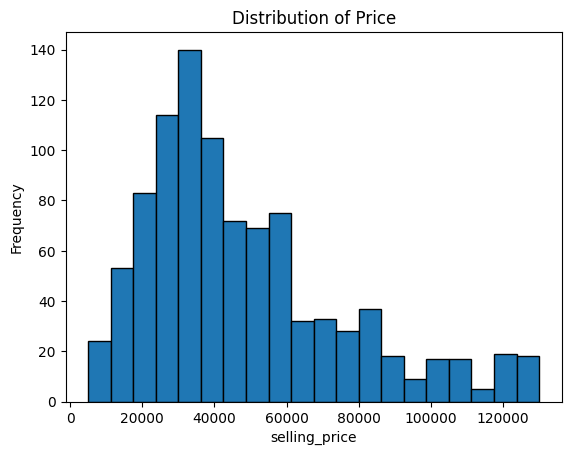

In [11]:
# Check Data Distribution
#Visualize the distribution of key numeric variables.    #histograms
plt.hist(data['selling_price'], bins=20, edgecolor='k')
plt.title('Distribution of Price')
plt.xlabel('selling_price')
plt.ylabel('Frequency')
plt.show()

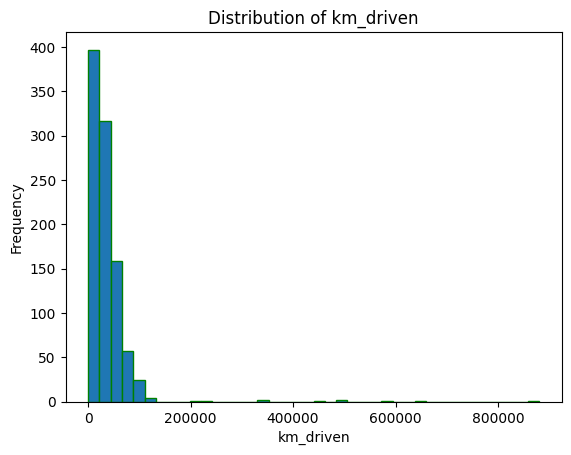

In [12]:
plt.hist(data['km_driven'],bins=40,edgecolor='g')
plt.title('Distribution of km_driven')
plt.xlabel('km_driven')
plt.ylabel('Frequency')
plt.show()

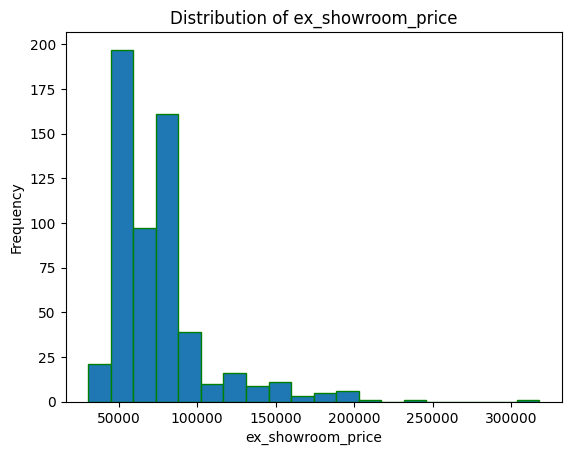

In [13]:
plt.hist(data['ex_showroom_price'],bins=20,edgecolor='g')
plt.title('Distribution of ex_showroom_price')
plt.xlabel('ex_showroom_price')
plt.ylabel('Frequency')
plt.show()

In [14]:
#3. Analyze Categorical Variables
#Find counts and proportions of categorical variables

# Example: Analyze 'name' column

print(data['name'].value_counts())

   


name
Bajaj Pulsar 150                 41
Honda Activa [2000-2015]         22
Honda CB Hornet 160R             21
Bajaj Pulsar 180                 20
Royal Enfield Thunderbird 350    17
                                 ..
Suzuki Intruder 150 Fi            1
Vespa LX 125                      1
Hero Honda CD100SS                1
Royal Enfield Thunderbird 500     1
Bajaj  ct 100                     1
Name: count, Length: 251, dtype: int64


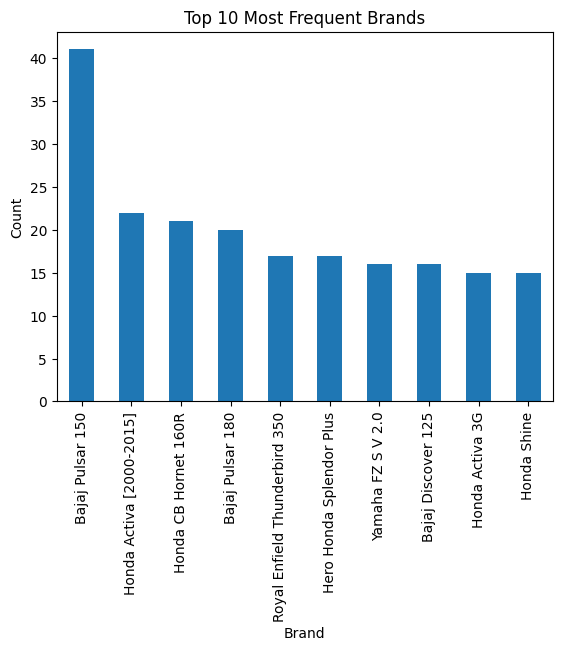

In [15]:
 # Plot a bar chart
data['name'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Frequent Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

In [16]:
#Questions
#1- What is the range of selling prices in the dataset

min_price = data['selling_price'].min()  # Minimum price
max_price = data['selling_price'].max()  # Maximum price

print(f"The range of selling prices is from {min_price} to {max_price}.")

The range of selling prices is from 5000 to 130000.


In [17]:
#2-What is the median selling price for bikes in the dataset?

median_price = data['selling_price'].median()
print(f"The median selling price for bikes is {median_price}.")

The median selling price for bikes is 40000.0.


In [18]:
#3-What is the most common seller type?

# Bar chart for seller types
seller_type_counts = data['seller_type'].value_counts()
seller_type_counts

seller_type
Individual    962
Dealer          6
Name: count, dtype: int64

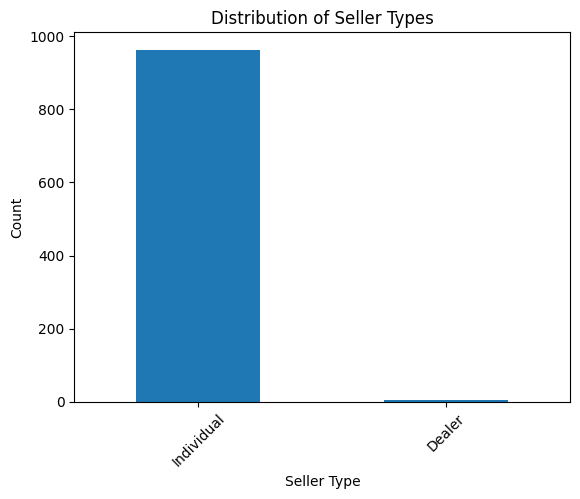

In [19]:
seller_type_counts.plot(kind='bar')
plt.title('Distribution of Seller Types')
plt.xlabel('Seller Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [20]:
#ANS3-most common seller type is individual


In [21]:
 #4-How many bikes have driven more than 50,000 kilometers

In [22]:
countabove_50k = data[data['km_driven'] > 50000]['km_driven'].count()
print(f"The number of bikes that have driven more than 50,000 kilometers is {countabove_50k}.")

The number of bikes that have driven more than 50,000 kilometers is 168.


In [23]:
#5-What is the average km_driven value for each ownership type
avgkm_owner = data.groupby('owner')['km_driven'].mean()

print("Average km_driven value for each ownership type:",avgkm_owner)


Average km_driven value for each ownership type: owner
1st owner     34903.509501
2nd owner     41012.464912
3rd owner     34621.400000
4th owner    464000.000000
Name: km_driven, dtype: float64


In [24]:
#6-What proportion of bikes are from the year 2015 or older?
proportion = (data['year'] <= 2015).mean()
print(f"The proportion of bikes from the year 2015 or older is {proportion:.2%}.")

The proportion of bikes from the year 2015 or older is 60.74%.


In [25]:
#7-What is the trend of missing values across the dataset
# Check for missing values
print(data.isnull().sum())

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    390
dtype: int64


In [26]:
#8-B What is the highest ex_showroom_price recorded, and for which bike
# Find the row with the highest ex-showroom price
max_pr_row = data.loc[data['ex_showroom_price'].idxmax()]

highest_price = max_pr_row['ex_showroom_price']
bike_name = max_pr_row['name']
print(f"The highest ex-showroom price is {highest_price}, recorded for the bike: {bike_name}.")

The highest ex-showroom price is 317934.0, recorded for the bike: Kawasaki Ninja 250R.


In [27]:
#9-What is the total number of bikes listed by each seller type

seller_typecounts = data['seller_type'].value_counts()

print("Total number of bikes listed by each seller type:")
print(seller_typecounts)

Total number of bikes listed by each seller type:
seller_type
Individual    962
Dealer          6
Name: count, dtype: int64


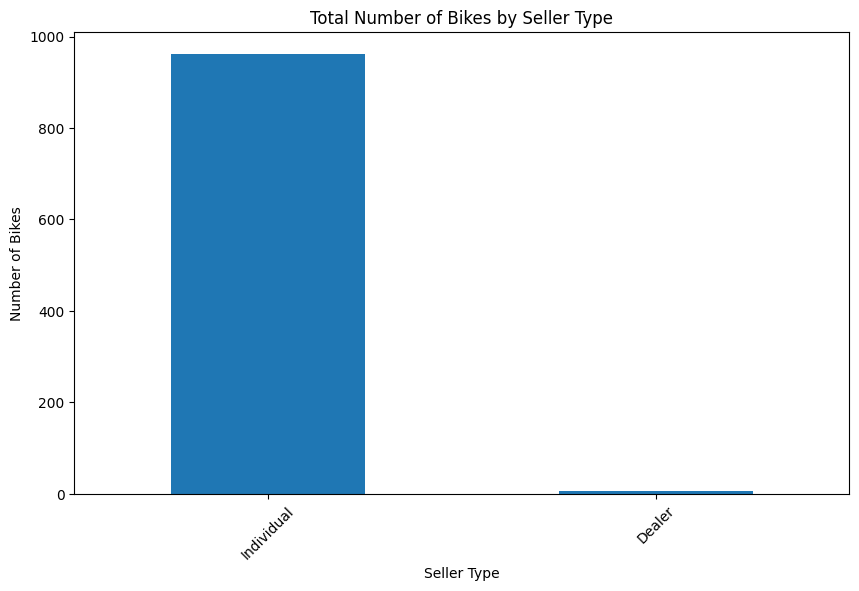

In [28]:
seller_typecounts.plot(kind='bar', figsize=(10, 6))
plt.title('Total Number of Bikes by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Number of Bikes')
plt.xticks(rotation=45)
plt.show()

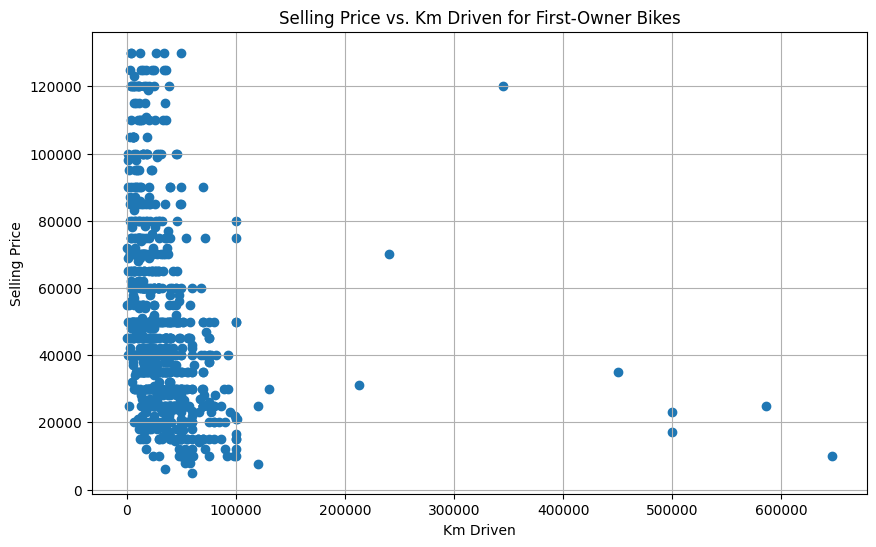

In [29]:
#10- What is the relationship between selling_price and km_driven for first-owner bikes
fst_owner_bikes = data[data['owner'] == '1st owner']
    
# Scatter plot for Selling Price vs. Km Driven
plt.figure(figsize=(10, 6))
plt.scatter(fst_owner_bikes['km_driven'], fst_owner_bikes['selling_price'], )
plt.title('Selling Price vs. Km Driven for First-Owner Bikes')
plt.xlabel('Km Driven')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

In [30]:
#a downward trend: as the kilometers driven increase, the selling price generally decreases.
#  This means that bikes with higher km-driven tend to sell for lower prices.

In [31]:
#11-Identify and remove outliers in the km_driven column using the IQR method
# Drop rows with NaN values in 
data = data.dropna(subset=['km_driven'])

#  Q1 and Q3
Q1 = data['km_driven'].quantile(0.25)
Q3 = data['km_driven'].quantile(0.75)
IQR = Q3 - Q1

#lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers
data_cleaned = data[(data['km_driven'] >= lower_bound) & (data['km_driven'] <= upper_bound)]

num_removed = len(data) - len(data_cleaned)
print(f"Number of outliers removed: {num_removed}")



Number of outliers removed: 35


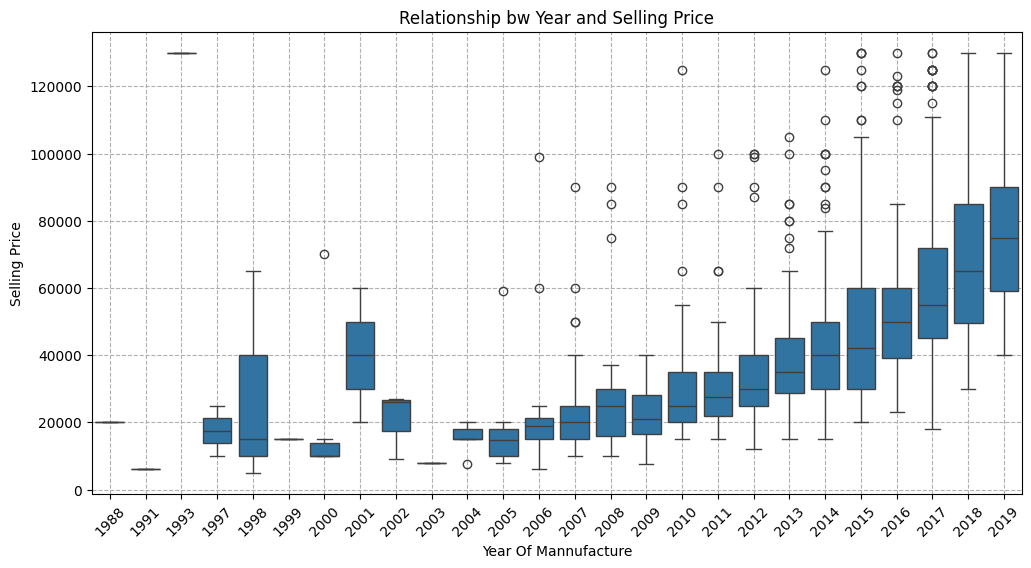

In [32]:
#12- Perform a bivariate analysis to visualize the relationship between year and selling_price

#ANS-The relationship between year (numeric) and selling_price (numeric) can be effectively visualized using a boxplot 
#A boxplot allows us to see the distribution of selling prices for bikes manufactured in different years
# including the median and outliers.

plt.figure(figsize=(12,6))

sns.boxplot(x='year',y='selling_price',data=data)

plt.title('Relationship bw Year and Selling Price')
plt.xlabel('Year Of Mannufacture')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.grid(True,linestyle='--')
plt.show()


In [33]:
#Insights>>There is a clear upward trend in the median selling price as the year of manufacture increases.
#Bikes in recent years (e.g, 2015-2019) have significantly higher selling prices compared to older bikes.

In [34]:
#13-What is the average depreciation in selling price based on the bike's age (current year - manufacturing)
import datetime

# Adding the current year
current_year = datetime.datetime.now().year
current_year

2025

In [35]:
# Calculate bike age
data['age'] = current_year - data['year']
data['age']

1        8
3       10
4       14
5       15
6        7
        ..
1056    15
1057    13
1058    12
1059    16
1060    17
Name: age, Length: 968, dtype: int64

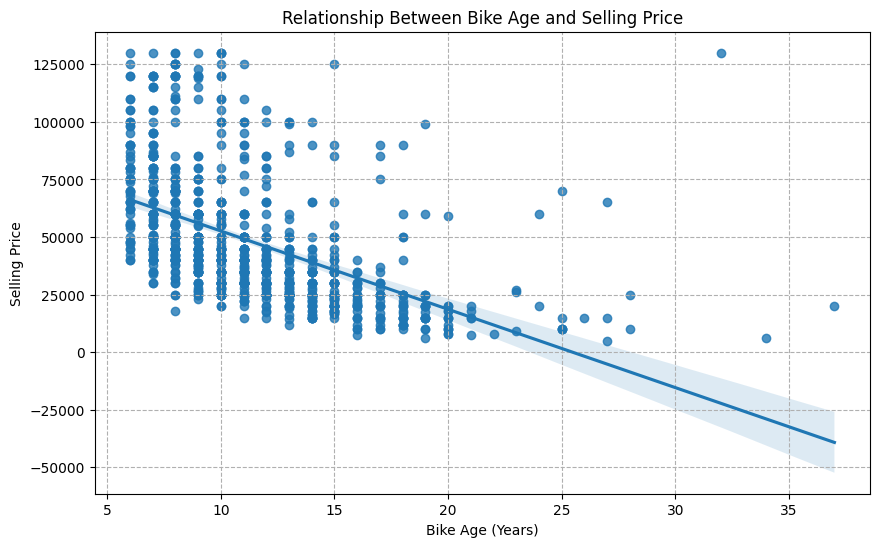

In [36]:
# Create the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='selling_price', data=data)

plt.title('Relationship Between Bike Age and Selling Price')
plt.xlabel('Bike Age (Years)')
plt.ylabel('Selling Price')
plt.grid(True, linestyle='--')
plt.show()

In [37]:
#14-Which bike names are priced significantly above the average price for their manufacturing year?
# Calculating the average selling price for each year
avgpriceby_year = data.groupby('year')['selling_price'].mean()
avgpriceby_year


year
1988     20000.000000
1991      6000.000000
1993    130000.000000
1997     17500.000000
1998     28333.333333
1999     15000.000000
2000     20833.333333
2001     40000.000000
2002     20666.666667
2003      8000.000000
2004     15100.000000
2005     16978.571429
2006     23380.000000
2007     24927.586207
2008     28892.592593
2009     22240.740741
2010     31993.220339
2011     31249.983333
2012     35976.637681
2013     41309.859155
2014     45542.222222
2015     52083.333333
2016     53846.456311
2017     64070.796460
2018     68379.894231
2019     75988.300000
Name: selling_price, dtype: float64

In [38]:
# Adding the average price for each year to the dataset
data['avg_price'] = data['year'].map(avgpriceby_year)
data['avg_price']

1       64070.796460
3       52083.333333
4       31249.983333
5       31993.220339
6       68379.894231
            ...     
1056    31993.220339
1057    35976.637681
1058    41309.859155
1059    22240.740741
1060    28892.592593
Name: avg_price, Length: 968, dtype: float64

In [39]:
data

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,avg_price
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,8,64070.796460
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,10,52083.333333
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,14,31249.983333
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0,15,31993.220339
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0,7,68379.894231
...,...,...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0,15,31993.220339
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0,13,35976.637681
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0,12,41309.859155
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0,16,22240.740741


In [40]:
# Identifying bikes significantly above average (e.g-1.5 times)
sig_bikes = data[data['selling_price'] > 1.5 * data['avg_price']]
sig_bikes

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,avg_price
19,Yamaha FZ25,120000,2018,Individual,1st owner,39000,132680.0,7,68379.894231
24,Royal Enfield Thunderbird 350,110000,2016,Individual,1st owner,20000,NaN,9,53846.456311
37,Honda CBR-250R,120000,2016,Individual,1st owner,16000,202310.0,9,53846.456311
39,Royal Enfield Thunderbird 350,90000,2015,Individual,3rd owner,13000,NaN,10,52083.333333
40,Bajaj Dominar 400,125000,2017,Individual,1st owner,12800,NaN,8,64070.796460
...,...,...,...,...,...,...,...,...,...
981,Royal Enfield Thunder 350,105000,2013,Individual,1st owner,6900,150000.0,12,41309.859155
982,Royal Enfield Bullet 350,105000,2018,Individual,1st owner,6000,117000.0,7,68379.894231
983,Royal Enfield Classic 350,100000,2015,Individual,1st owner,46500,147000.0,10,52083.333333
984,Royal Enfield Classic 500,95000,2014,Individual,1st owner,11500,175000.0,11,45542.222222


In [41]:
# Display significant bikes
sigbikes_names = sig_bikes[['name', 'year', 'selling_price','avg_price']]
sigbikes_names


,name,year,selling_price,avg_price
19,Yamaha FZ25,2018,120000,68379.894231
24,Royal Enfield Thunderbird 350,2016,110000,53846.456311
37,Honda CBR-250R,2016,120000,53846.456311
39,Royal Enfield Thunderbird 350,2015,90000,52083.333333
40,Bajaj Dominar 400,2017,125000,64070.796460
...,...,...,...,...
981,Royal Enfield Thunder 350,2013,105000,41309.859155
982,Royal Enfield Bullet 350,2018,105000,68379.894231
983,Royal Enfield Classic 350,2015,100000,52083.333333
984,Royal Enfield Classic 500,2014,95000,45542.222222


In [42]:
sigbikes_names['name'].unique()

array(['Yamaha FZ25', 'Royal Enfield Thunderbird 350', 'Honda CBR-250R',
       'Bajaj Dominar 400', 'Royal Enfield Electra 5 S',
       'Royal Enfield Bullet 350', 'Royal Enfield Electra 4 S',
       'Hero Honda Karizma ZMR [2010]', 'Royal Enfield Classic 350',
       'KTM 390 Duke ABS [2013-2016]', 'KTM 200 Duke',
       'Royal Enfield Classic 500', 'TVS Apache RTR 200 4V',
       'Bajaj Pulsar 150', 'Royal Enfield Classic Desert Storm',
       'KTM RC 200', 'Honda CB Unicorn 150', 'Yamaha YZF R15 [2011-2018]',
       'Royal Enfield Bullet 500', 'Royal Enfield Bullet 350 [2007-2011]',
       'Royal Enfield Machismo', 'Kawasaki Ninja 250R', 'Yamaha Rx',
       'Yamaha Fazer Dlx', 'Yamaha YZF R15 V3',
       'Royal Enfield Thunderbird 500', 'Bajaj Pulsar 220 Fi',
       'KTM 125 Duke', 'Hero Honda Splendor Plus',
       'Bajaj Pulsar 150 [2001-2011]', 'Yamaha YZF R15 S',
       'Yamaha Fazer 25', 'Yamaha RX135', 'Honda CBR150 R',
       'Bajaj Pulsar 180', 'Bajaj Avenger [2015]',
     

In [43]:
#15-Develop a correlation matrix for numeric columns and visualize it using a heatmap
data

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age,avg_price
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,8,64070.796460
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,10,52083.333333
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,14,31249.983333
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0,15,31993.220339
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0,7,68379.894231
...,...,...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0,15,31993.220339
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0,13,35976.637681
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0,12,41309.859155
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0,16,22240.740741


In [44]:
# Select numeric columns and compute the correlation matrix

numeric_col = data.select_dtypes(include=['number'])

correlation_matrix = numeric_col.corr()
correlation_matrix




,selling_price,year,km_driven,ex_showroom_price,age,avg_price
selling_price,1.000000,0.520345,-0.227653,0.773583,-0.520345,0.595056
year,0.520345,1.000000,-0.264997,0.120527,-1.000000,0.874447
km_driven,-0.227653,-0.264997,1.000000,-0.105358,0.264997,-0.290295
ex_showroom_price,0.773583,0.120527,-0.105358,1.000000,-0.120527,0.118444
age,-0.520345,-1.000000,0.264997,-0.120527,1.000000,-0.874447
avg_price,0.595056,0.874447,-0.290295,0.118444,-0.874447,1.000000


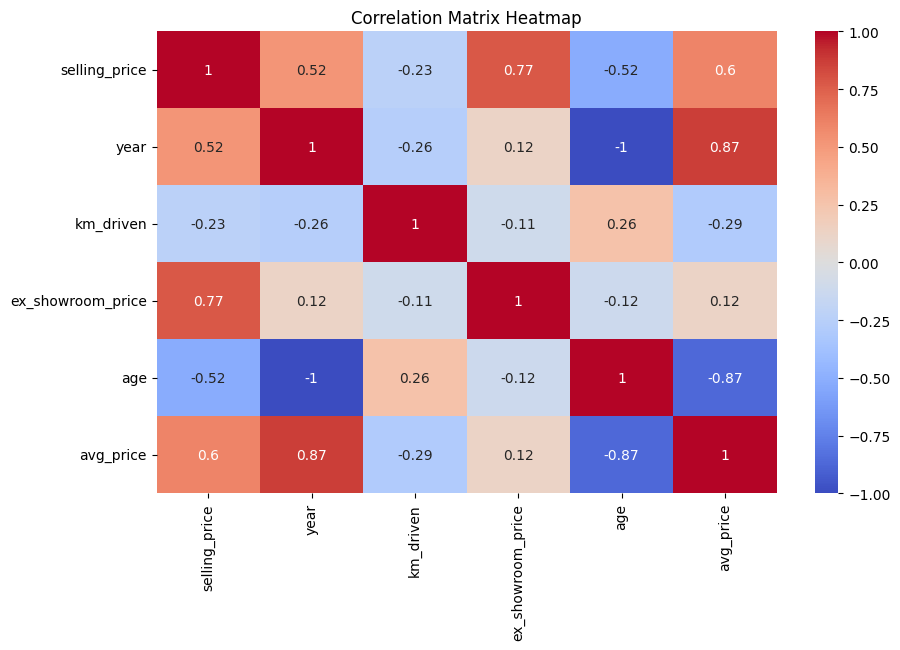

In [45]:
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [46]:
#Insights from heatmap
#1. Strong Positive Correlation Between selling_price and ex_showroom_price (Correlation = 0.77):
#This indicates that bikes with higher ex-showroom prices tend to have higher selling prices.


#2. Strong Negative Correlation Between age and selling_price (Correlation = -0.52):
#This shows that older bikes generally have lower selling prices.


In [47]:
#EDA 2-CAR SALES DATASET

In [48]:
data=pd.read_csv('C:/Users/Dell/Downloads/Car Sale.csv')
data.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [49]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [50]:
data.describe()

,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [51]:
# Check for remaining missing values
data.isnull().sum()





Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [52]:
#1- What is the average selling price of cars for each dealer, and how does it compare across different dealers?

avg_dealerprice = data.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
avg_dealerprice



Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.562050
Pars Auto Sales             

In [53]:

#2- Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends

price_var = data.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
price_var


Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64

In [54]:
price_vardf=price_var.reset_index()
price_vardf.columns=['Company','Price Var(std)']

highest_var = price_vardf.iloc[0]
highest_var

Company                Lincoln
Price Var(std)    19658.050211
Name: 0, dtype: object

In [55]:
#3-What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare 

transdist = data.groupby('Transmission')['Price ($)'].describe()
transdist


,count,mean,std,min,25%,50%,75%,max
Transmission,,,,,,,,
Auto,12571.0,28248.525972,13747.070597,1200.0,19000.0,24000.0,35500.0,75700.0
Manual,11335.0,27914.710631,15862.871978,1700.0,17000.0,22001.0,34000.0,85800.0


In [56]:
transdist['IQR'] =(transdist['75%'] - transdist['25%'])
transdist['IQR']

Transmission
Auto      16500.0
Manual    17000.0
Name: IQR, dtype: float64

In [57]:
 #4-What is the distribution of car prices across different regions
price_reg = data.groupby('Dealer_Region')['Price ($)'].describe()
price_reg


,count,mean,std,min,25%,50%,75%,max
Dealer_Region,,,,,,,,
Aurora,3130.0,28334.626837,15026.207252,9000.0,18001.0,23000.0,35000.0,85800.0
Austin,4135.0,28341.603628,14903.884549,9000.0,18001.0,23801.0,35001.0,85601.0
Greenville,3128.0,28180.819054,15101.538328,1200.0,18001.0,22500.0,34500.0,85200.0
Janesville,3821.0,27833.350955,14344.995638,4300.0,18001.0,23000.0,34000.0,85400.0
Middletown,3128.0,27856.338875,14619.842395,1700.0,18000.0,22750.0,34000.0,85300.0
Pasco,3131.0,28119.039923,14659.315941,9000.0,18500.5,23000.0,34000.0,85600.0
Scottsdale,3433.0,27954.958928,14902.916820,1450.0,18000.0,22600.0,33500.0,85001.0


In [58]:
 #5-What is the distribution of cars based on body styles

# Calculate the distribution of cars by body style
bodydist = data['Body Style'].value_counts()
bodydist

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64

In [59]:
#6-How does the average selling price of cars vary by customer gender and annual income


gendincomeprice = data.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().reset_index()
gendincomeprice


,Gender,Annual Income,Price ($)
0,Female,13500,28132.038732
1,Female,106000,46001.000000
2,Female,121000,20000.000000
3,Female,190000,19001.000000
4,Female,211000,51000.000000
...,...,...,...
3437,Male,6600000,39000.000000
3438,Male,6800000,15000.000000
3439,Male,7650000,21000.000000
3440,Male,8000000,85000.000000


In [60]:
#7-What is the distribution of car prices by region, and how does the number of cars sold vary by region

region = data.groupby('Dealer_Region')['Price ($)'].describe()
region



,count,mean,std,min,25%,50%,75%,max
Dealer_Region,,,,,,,,
Aurora,3130.0,28334.626837,15026.207252,9000.0,18001.0,23000.0,35000.0,85800.0
Austin,4135.0,28341.603628,14903.884549,9000.0,18001.0,23801.0,35001.0,85601.0
Greenville,3128.0,28180.819054,15101.538328,1200.0,18001.0,22500.0,34500.0,85200.0
Janesville,3821.0,27833.350955,14344.995638,4300.0,18001.0,23000.0,34000.0,85400.0
Middletown,3128.0,27856.338875,14619.842395,1700.0,18000.0,22750.0,34000.0,85300.0
Pasco,3131.0,28119.039923,14659.315941,9000.0,18500.5,23000.0,34000.0,85600.0
Scottsdale,3433.0,27954.958928,14902.916820,1450.0,18000.0,22600.0,33500.0,85001.0


In [61]:
regcount=data['Dealer_Region'].value_counts()
regcount

Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Middletown    3128
Greenville    3128
Name: count, dtype: int64

In [62]:
#8- How does the average car price differ between cars with different engine sizes

engsize_price = data.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)
engsize_price

Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64

In [63]:
#9- How do car prices vary based on the customer’s annual income bracket

income_price = data.groupby('Annual Income')['Price ($)'].mean()

In [64]:
income_price

Annual Income
10080       22801.000000
13500       27878.981415
24000       61001.000000
85000       43000.000000
106000      46001.000000
                ...     
6600000     39000.000000
6800000     15000.000000
7650000     21000.000000
8000000     85000.000000
11200000    26001.000000
Name: Price ($), Length: 2508, dtype: float64

In [65]:
#10-What are the top 5 car models with the highest number of sales, and how does their price distribution look
top_models = data['Model'].value_counts().head(5)
top_models 

Model
Diamante      418
Silhouette    411
Prizm         411
Passat        391
Ram Pickup    383
Name: count, dtype: int64

In [66]:
#11- How does car price vary with engine size across different car colors, and which colors have the highest price variation
eng_col_price = data.groupby(['Engine', 'Color'])['Price ($)'].mean().reset_index()
eng_col_price

,Engine,Color,Price ($)
0,DoubleÂ Overhead Camshaft,Black,25766.451103
1,DoubleÂ Overhead Camshaft,Pale White,30347.987460
2,DoubleÂ Overhead Camshaft,Red,27434.392314
3,Overhead Camshaft,Black,31732.967164
4,Overhead Camshaft,Pale White,24327.767694
5,Overhead Camshaft,Red,30153.405229


In [67]:
col_price_variation = data.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
col_price_variation 

Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64

In [68]:
#12- Is there any seasonal trend in car sales based on the date of sale
data.dtypes

Car_id           object
Date             object
Customer Name    object
Gender           object
Annual Income     int64
Dealer_Name      object
Company          object
Model            object
Engine           object
Transmission     object
Color            object
Price ($)         int64
Dealer_No        object
Body Style       object
Phone             int64
Dealer_Region    object
dtype: object

In [69]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Date']

0       2022-01-02
1       2022-01-02
2       2022-01-02
3       2022-01-02
4       2022-01-02
           ...    
23901   2023-12-31
23902   2023-12-31
23903   2023-12-31
23904   2023-12-31
23905   2023-12-31
Name: Date, Length: 23906, dtype: datetime64[ns]

In [70]:
data['Sale Month'] = data['Date'].dt.month
data['Sale Month']


0         1
1         1
2         1
3         1
4         1
         ..
23901    12
23902    12
23903    12
23904    12
23905    12
Name: Sale Month, Length: 23906, dtype: int32

In [71]:
data['Sale Year'] = data['Date'].dt.year
data['Sale Year']

0        2022
1        2022
2        2022
3        2022
4        2022
         ... 
23901    2023
23902    2023
23903    2023
23904    2023
23905    2023
Name: Sale Year, Length: 23906, dtype: int32

In [72]:
monthly_sales = data.groupby('Sale Month')['Car_id'].count()
monthly_sales

Sale Month
1      790
2      735
3     1535
4     1655
5     1895
6     1715
7     1725
8     1705
9     3305
10    1830
11    3470
12    3546
Name: Car_id, dtype: int64

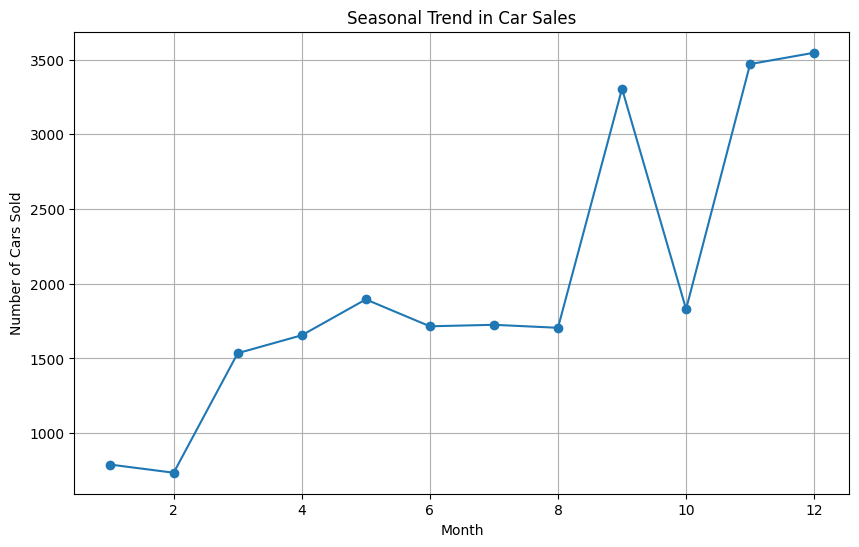

In [73]:
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Seasonal Trend in Car Sales')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.grid(True)
plt.show()

In [74]:
#Insight
#The most significant insight from the line chart on seasonal trends in car sales is the dramatic 
# increase in sales during (October to December) 


In [75]:
#13- How does the car price distribution change when considering different combinations of body style and transmission type
bodytrans_price = data.groupby(['Body Style', 'Transmission'])['Price ($)'].describe()
bodytrans_price

count          mean           std      min      25%  \
Body Style Transmission                                                         
Hardtop    Auto          1408.0  31520.188210  13687.756740  12000.0  21001.0   
           Manual        1563.0  27016.943698  14072.501848  11000.0  17575.5   
Hatchback  Auto          3458.0  25910.544824  13144.014337   4200.0  18001.0   
           Manual        2670.0  28702.550562  16284.049616   1700.0  17000.0   
Passenger  Auto          2020.0  28915.835149  13946.481932   9000.0  19000.0   
           Manual        1925.0  28969.521039  18523.684163  10000.0  16001.0   
SUV        Auto          3086.0  27501.404407  13299.927913   1200.0  19000.0   
           Manual        3288.0  26079.019161  14621.526541   2200.0  17000.0   
Sedan      Auto          2599.0  29955.294344  14310.910860  12000.0  19000.0   
           Manual        1889.0  29664.271572  15440.056434  11000.0  19001.0   

                             50%      75%      max  
Body Style Transmission                             
Hardtop    Auto          27000.0  43125.0  75501.0  
           Manual        22001.0  29000.0  82500.0  
Hatchback  Auto          21500.0  31000.0  75700.0  
           Manual        23000.0  36001.0  85600.0  
Passenger  Auto          25000.0  38000.0  69801.0  
           Manual        22000.0  37000.0  85800.0  
SUV        Auto          25000.0  33000.0  75501.0  
           Manual        22000.0  28000.0  85500.0  
Sedan      Auto          26000.0  39500.0  69980.0  
           Manual        25000.0  36600.0  69700.0

In [76]:
#14-What is the correlation between car price, engine size, and annual income of customers, and how do these features interact


correlation_data = data[['Price ($)', 'Annual Income']]



In [77]:
correlation_matrix = correlation_data.corr()
correlation_matrix

,Price ($),Annual Income
Price ($),1.000000,0.012065
Annual Income,0.012065,1.000000


In [78]:
#15-How does the average car price vary across different car models and engine types?

modeleng_price = data.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()
modeleng_price



,Model,Engine,Price ($)
0,3-Sep,DoubleÂ Overhead Camshaft,37986.380117
1,3000GT,DoubleÂ Overhead Camshaft,22764.326923
2,3000GT,Overhead Camshaft,21770.659864
3,300M,DoubleÂ Overhead Camshaft,21394.888889
4,323i,DoubleÂ Overhead Camshaft,16744.632287
...,...,...,...
256,Windstar,Overhead Camshaft,17100.272727
257,Wrangler,DoubleÂ Overhead Camshaft,21145.294737
258,Wrangler,Overhead Camshaft,18742.942029
259,Xterra,DoubleÂ Overhead Camshaft,15940.459459


In [79]:
top10_models = data['Model'].value_counts().head(10)
top10_models

Model
Diamante      418
Silhouette    411
Prizm         411
Passat        391
Ram Pickup    383
Jetta         382
RL            372
LS400         354
LHS           330
A6            329
Name: count, dtype: int64

In [108]:
#EDA-4-Spotify data --Popular Hip-Hop

#1-Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful
#ANS-
data=pd.read_csv('C:/Users/Dell/Downloads/spotify.csv')
data

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [109]:
mis_values = data.isnull().sum()    #null value
mis_values


Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [115]:
data = data.drop_duplicates()   #remove duplicates

In [116]:
data.dtypes

Artist           object
Track Name       object
Popularity        int64
Duration (ms)     int64
Track ID         object
dtype: object

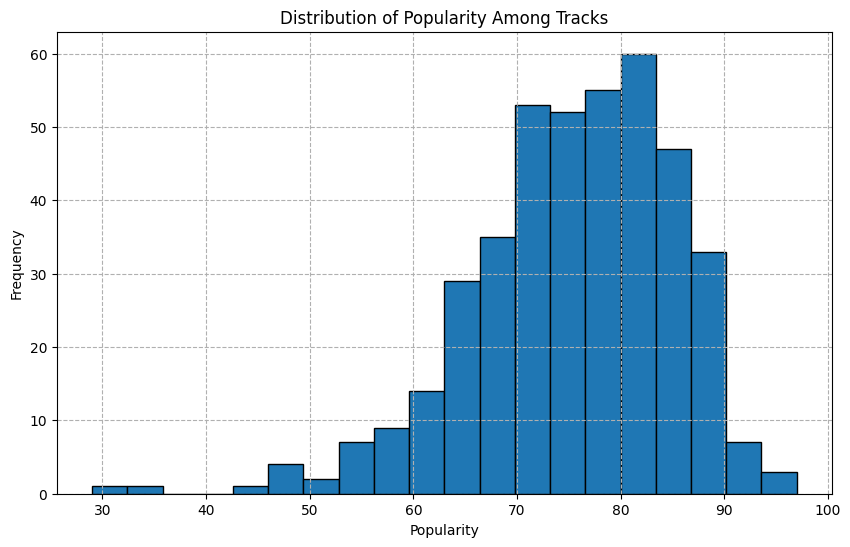

In [118]:
#2-What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

plt.figure(figsize=(10, 6))
plt.hist(data['Popularity'], bins=20, edgecolor='black')
plt.title('Distribution of Popularity Among Tracks')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid( linestyle='--')
plt.show()

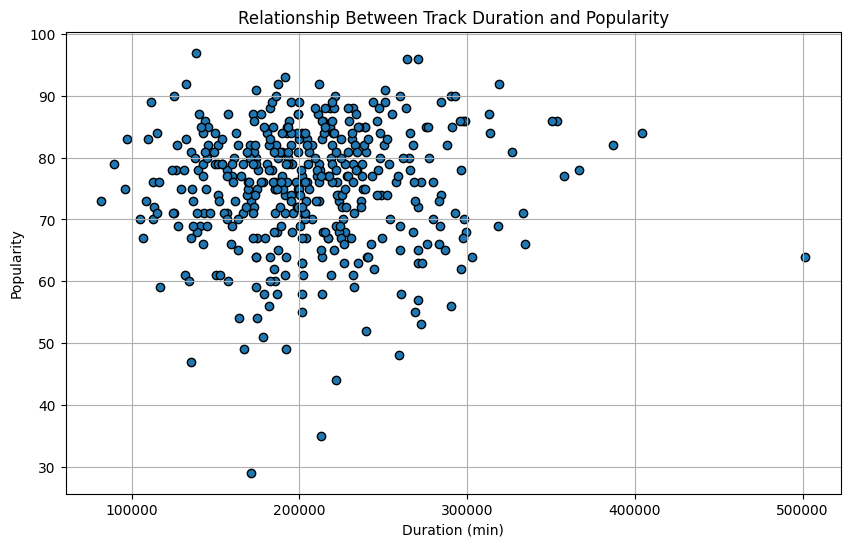

In [124]:
#3- Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot


plt.figure(figsize=(10, 6))
plt.scatter(data['Duration (ms)'], data['Popularity'], edgecolor='black')
plt.title('Relationship Between Track Duration and Popularity')
plt.xlabel('Duration (min)')
plt.ylabel('Popularity' )
plt.grid()
plt.show()


In [125]:
#Insights>>There is no strong linear relationship between track duration and popularity.
#Most tracks have durations between 2 to 5 minutes.
#Extremely short or long tracks tend to have lower popularity.

In [129]:
#4-Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

art_counts = data['Artist'].value_counts()
art_counts

Artist
Drake             17
Eminem            11
Flo Rida          10
Ludacris          10
Timbaland         10
                  ..
Arizona Zervas     1
Fivio Foreign      1
Pressa             1
David Guetta       1
Diddy              1
Name: count, Length: 115, dtype: int64

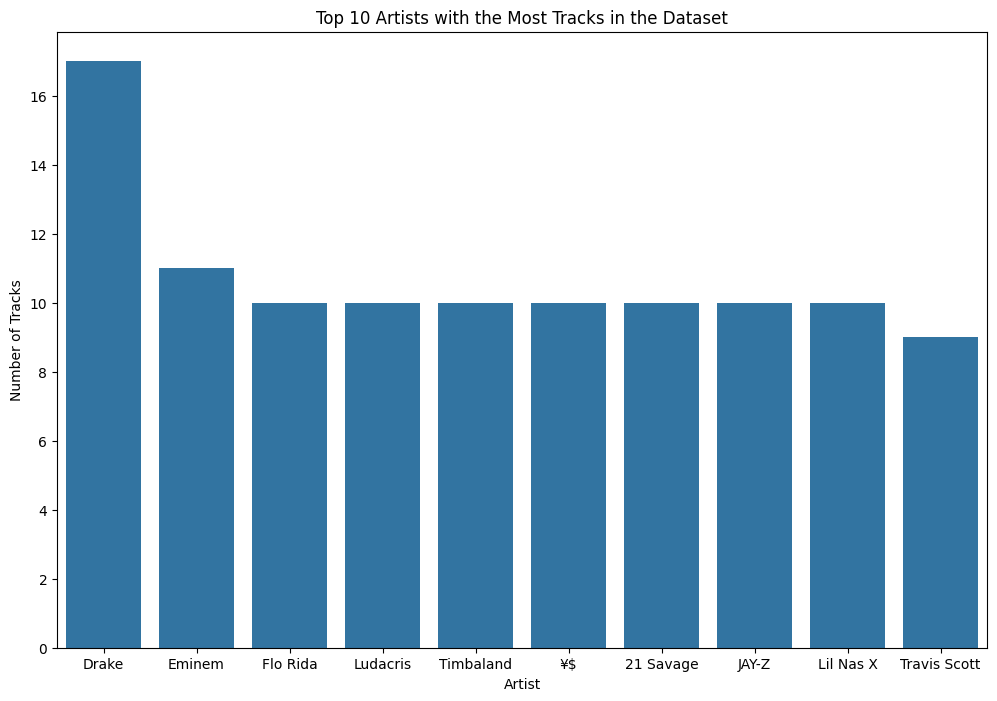

In [130]:
plt.figure(figsize=(12, 8))
sns.barplot(x=art_counts.index[:10], y=art_counts.values[:10])
plt.title('Top 10 Artists with the Most Tracks in the Dataset')
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.show()

In [132]:
#5-What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
lpop = data.sort_values('Popularity')[['Artist', 'Track Name', 'Popularity']].head(5)
lpop


,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


In [157]:
#6-Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and 
# display the average popularity for each artist

top5_art = data['Artist'].value_counts().head(5).index
top5_art


Index(['Drake', 'Eminem', 'Flo Rida', 'Ludacris', 'Timbaland'], dtype='object', name='Artist')

In [158]:
avg_pop = data[data['Artist'].isin(top5_art)].groupby('Artist')['Popularity'].mean()  #avg pop per artist
avg_pop

Artist
Drake        82.882353
Eminem       83.636364
Flo Rida     78.000000
Ludacris     63.000000
Timbaland    69.000000
Name: Popularity, dtype: float64

In [159]:
# Sort by average popularity
avg_sort= avg_pop.sort_values(ascending=False)
avg_sort

Artist
Eminem       83.636364
Drake        82.882353
Flo Rida     78.000000
Timbaland    69.000000
Ludacris     63.000000
Name: Popularity, dtype: float64

In [162]:
#7- For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

top5_art = data['Artist'].value_counts().head(5).index
top5_art

Index(['Drake', 'Eminem', 'Flo Rida', 'Ludacris', 'Timbaland'], dtype='object', name='Artist')

In [164]:
#most pop tracks
mpop_tracks=data[data['Artist'].isin(top5_art)]
mpop_tracks

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
5,Drake,God's Plan,87,198973,6DCZcSspjsKoFjzjrWoCdn
6,Drake,Passionfruit,86,298940,5mCPDVBb16L4XQwDdbRUpz
8,Drake,Fair Trade (with Travis Scott),85,291175,40iJIUlhi6renaREYGeIDS
9,Drake,Rich Flex,85,239359,1bDbXMyjaUIooNwFE9wn0N
62,Drake,Forever,77,357706,5UsLjwBaTHBX4ektWIr4XX


In [ ]:
m_poptrk_perart = mpop_tracks.loc[mpop_tracks.groupby('Artist')['Popularity'].idxmax()][['Artist', 'Track Name', 'Popularity']]

In [170]:
m_poptrk_perart=mpop_tracks.loc[mpop_tracks.groupby('Artist')['Popularity'].idxmax()]
m_poptrk_perart


,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
80,Eminem,Without Me,90,290320,7lQ8MOhq6IN2w8EYcFNSUk
300,Flo Rida,Low (feat. T-Pain),84,231400,0CAfXk7DXMnon4gLudAp7J
371,Ludacris,My Chick Bad,67,216933,3bMNprrp2JDKZsGbiXpsJl
380,Timbaland,The Way I Are,85,179120,2bLqfJjuC5syrsgDsZfGmn


In [174]:
m_poptrk_perart[['Artist', 'Track Name', 'Popularity']]     #track name for each artist

,Artist,Track Name,Popularity
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92
80,Eminem,Without Me,90
300,Flo Rida,Low (feat. T-Pain),84
371,Ludacris,My Chick Bad,67
380,Timbaland,The Way I Are,85


In [175]:
#8-Visualize relationships between multiple numerical variables simultaneously using a pair plot
data.dtypes

Artist           object
Track Name       object
Popularity        int64
Duration (ms)     int64
Track ID         object
dtype: object

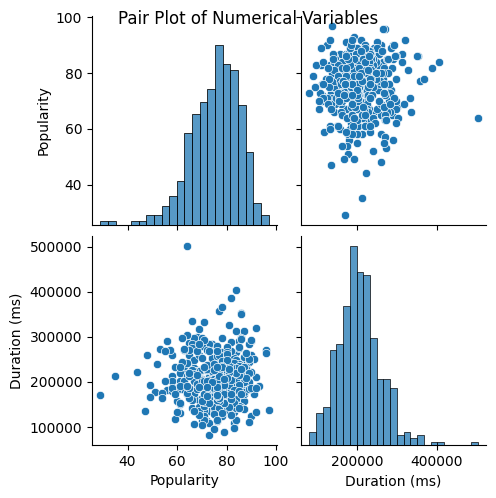

In [178]:
# Simplify the pair plot to numerical variables
sns.pairplot(data[['Popularity', 'Duration (ms)']], diag_kind='hist')
plt.suptitle('Pair Plot of Numerical Variables')
plt.show()


In [179]:
#Insights>>Popularity: The histogram shows most tracks with popularity between 70 and 85.
#Duration (ms): The histogram indicates most tracks have durations around 200,000 to 250,000 ms (3-4 minutes).
#The scatter plot highlights that there is no strong  relationship between popularity and duration.

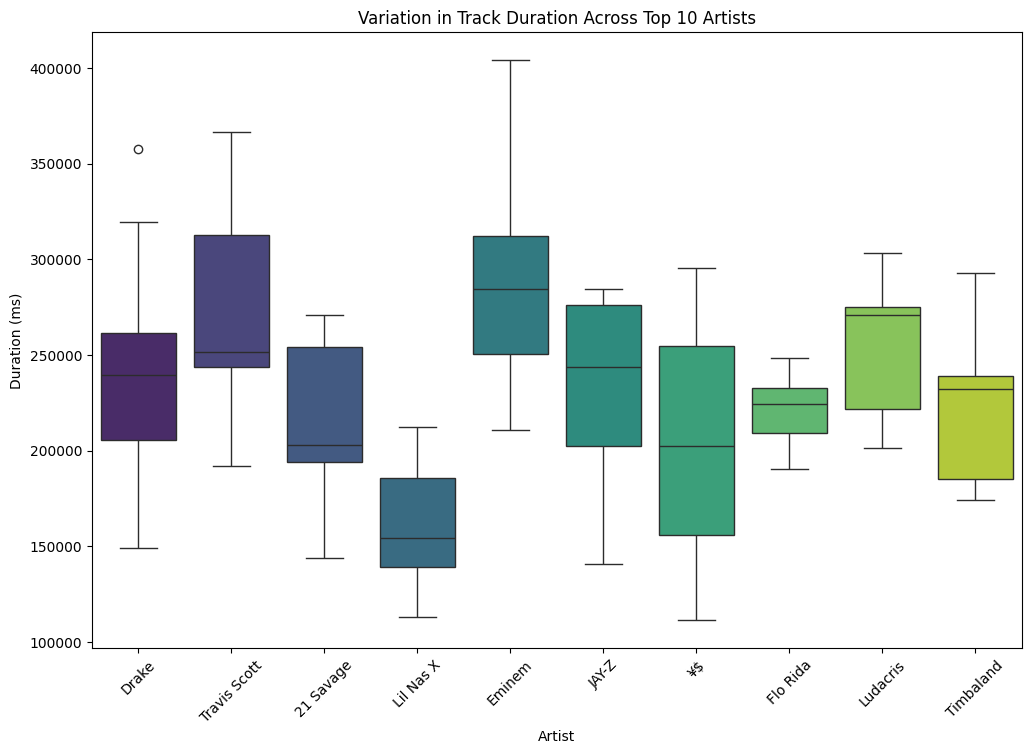

In [184]:
#9- Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot
top_artists = data['Artist'].value_counts().head(10).index

plt.figure(figsize=(12, 8))
sns.boxplot(data=data[data['Artist'].isin(top_artists)], x='Artist', y='Duration (ms)', palette="viridis")
plt.title('Variation in Track Duration Across Top 10 Artists', )
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=45)
plt.show()

In [183]:
#Insights>>Drake, Travis Scott, and Eminem have long median track duration.

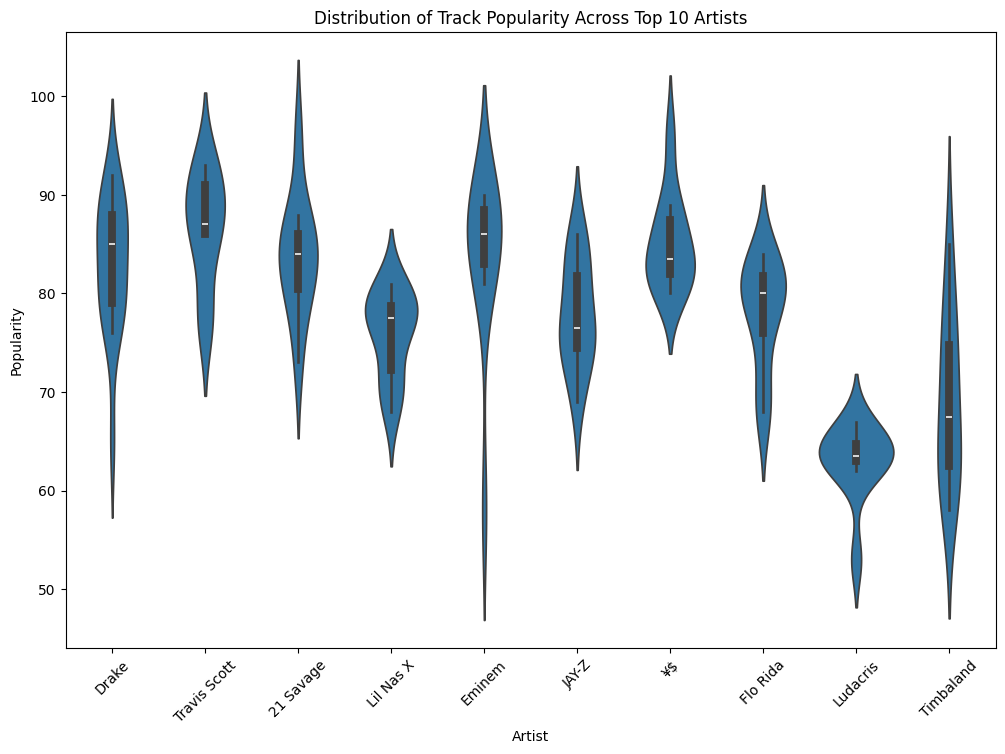

In [185]:
#10-How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

plt.figure(figsize=(12, 8))
sns.violinplot(data=data[data['Artist'].isin(top_artists)], x='Artist', y='Popularity')
plt.title('Distribution of Track Popularity Across Top 10 Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.show()
